<a href="https://colab.research.google.com/github/Do-Nhat-Truong/AI-VietNam-Module5-week3/blob/main/Module5W3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bài toán 1

In [1]:
!gdown --id 1qiUDDoYyRLBiKOoYWdFl_5WByHE8Cugu

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1qiUDDoYyRLBiKOoYWdFl_5WByHE8Cugu
To: /content/Auto_MPG_data.csv
100% 15.4k/15.4k [00:00<00:00, 58.0MB/s]


In [2]:
import numpy as np  # Thư viện cho tính toán ma trận và các phép toán số học.
import pandas as pd  # Thư viện xử lý dữ liệu dưới dạng bảng (DataFrame).

import matplotlib.pyplot as plt  # Thư viện vẽ biểu đồ, trực quan hóa dữ liệu.

import torch  # Thư viện chính cho tính toán tensor và deep learning của PyTorch.
import torch.nn as nn  # Gói con của PyTorch cho xây dựng mạng neural.
import torch.nn.functional as F  # Gói con chứa các hàm hoạt động cho mạng neural.
from torch.utils.data import Dataset, DataLoader  # Công cụ hỗ trợ xử lý dữ liệu huấn luyện.

from sklearn.model_selection import train_test_split  # Hàm chia tập dữ liệu thành tập huấn luyện và tập kiểm tra.
from sklearn.preprocessing import StandardScaler  # Công cụ chuẩn hóa dữ liệu (standardization).


In [4]:
random_state = 59  # Giá trị seed cố định để đảm bảo tái hiện kết quả.

# Đặt giá trị seed cho NumPy để các số ngẫu nhiên của NumPy có tính tái hiện.
np.random.seed(random_state)

# Đặt giá trị seed cho PyTorch (áp dụng cho CPU và GPU không dùng CUDA).
torch.manual_seed(random_state)

# Nếu CUDA (GPU) khả dụng, đặt seed cho các phép tính trên GPU.
if torch.cuda.is_available():
    torch.cuda.manual_seed(random_state)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


In [6]:
dataset_path = '/content/Auto_MPG_data.csv'  # Đường dẫn đến tệp dữ liệu.
dataset = pd.read_csv(dataset_path)  # Đọc tệp CSV và tải vào một DataFrame.
dataset

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,0,0,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,0,0,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,0,0,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,0,0,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,0,0,1
...,...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86.0,2790.0,15.6,82,0,0,1
388,44.0,4,97.0,52.0,2130.0,24.6,82,1,0,0
389,32.0,4,135.0,84.0,2295.0,11.6,82,0,0,1
390,28.0,4,120.0,79.0,2625.0,18.6,82,0,0,1


In [8]:
X = dataset.drop(columns='MPG').values  # Loại bỏ cột 'MPG' để lấy các đặc trưng (features).
y = dataset['MPG'].values  # Lấy cột 'MPG' làm nhãn (labels).
print(X.shape, y.shape)

(392, 9) (392,)


In [10]:
val_size = 0.2  # Tỉ lệ dữ liệu dành cho tập validation.
test_size = 0.125  # Tỉ lệ dữ liệu dành cho tập kiểm tra.
is_shuffle = True  # Có xáo trộn dữ liệu trước khi chia hay không.

# Chia dữ liệu thành tập huấn luyện và tập validation.
X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=val_size,  # Tỉ lệ dữ liệu validation là 20%.
    random_state=random_state,  # Seed để tái hiện kết quả.
    shuffle=is_shuffle  # Xáo trộn dữ liệu trước khi chia.
)

# Chia tiếp tập huấn luyện thành tập huấn luyện chính và tập kiểm tra.
X_train, X_test, y_train, y_test = train_test_split(
    X_train, y_train,
    test_size=test_size,  # Tỉ lệ dữ liệu kiểm tra là 12.5%.
    random_state=random_state,  # Seed để tái hiện kết quả.
    shuffle=is_shuffle  # Xáo trộn dữ liệu trước khi chia.
)


In [11]:
# Chuẩn hóa dữ liệu với StandardScaler
normalizer = StandardScaler()
X_train = normalizer.fit_transform(X_train)  # Chuẩn hóa tập huấn luyện và tính toán các tham số chuẩn hóa.
X_val = normalizer.transform(X_val)         # Áp dụng chuẩn hóa lên tập validation.
X_test = normalizer.transform(X_test)       # Áp dụng chuẩn hóa lên tập kiểm tra.

# Chuyển đổi dữ liệu thành tensor PyTorch
X_train = torch.tensor(X_train, dtype=torch.float32)  # Chuyển X_train thành tensor float32.
X_val = torch.tensor(X_val, dtype=torch.float32)      # Chuyển X_val thành tensor float32.
X_test = torch.tensor(X_test, dtype=torch.float32)    # Chuyển X_test thành tensor float32.

y_train = torch.tensor(y_train, dtype=torch.float32)  # Chuyển y_train thành tensor float32.
y_val = torch.tensor(y_val, dtype=torch.float32)      # Chuyển y_val thành tensor float32.
y_test = torch.tensor(y_test, dtype=torch.float32)    # Chuyển y_test thành tensor float32.


In [12]:

class CustomDataset(Dataset):
    def __init__(self, X, y):
        """
        Hàm khởi tạo (constructor) của lớp CustomDataset.
        - X: Dữ liệu đầu vào (features).
        - y: Nhãn (labels) tương ứng.
        """
        self.X = X  # Lưu dữ liệu đầu vào.
        self.y = y  # Lưu nhãn mục tiêu.

    def __len__(self):
        """
        Trả về độ dài của dataset (số lượng mẫu).
        """
        return len(self.y)  # Độ dài của y (số nhãn).

    def __getitem__(self, idx):
        """
        Lấy một mẫu dữ liệu và nhãn tương ứng từ dataset.
        - idx: Chỉ số của mẫu cần lấy.
        """
        return self.X[idx], self.y[idx]  # Trả về cặp (features, label).


In [13]:
batch_size = 32  # Số lượng mẫu trong mỗi batch.

# Tạo dataset từ dữ liệu huấn luyện và validation.
train_dataset = CustomDataset(X_train, y_train)  # Dataset cho dữ liệu huấn luyện.
val_dataset = CustomDataset(X_val, y_val)        # Dataset cho dữ liệu validation.

# Tạo DataLoader cho tập huấn luyện và validation.
train_loader = DataLoader(
    train_dataset,    # Sử dụng dataset huấn luyện.
    batch_size=batch_size,  # Số lượng mẫu trong mỗi batch.
    shuffle=True      # Xáo trộn dữ liệu trong mỗi epoch.
)

val_loader = DataLoader(
    val_dataset,      # Sử dụng dataset validation.
    batch_size=batch_size,  # Số lượng mẫu trong mỗi batch.
    shuffle=False     # Không xáo trộn dữ liệu (giữ thứ tự ban đầu).
)


In [14]:
class MLP(nn.Module):
    def __init__(self, input_dims, hidden_dims, output_dims):
        """
        MLP (Multilayer Perceptron) với 2 tầng ẩn.
        - input_dims: Số lượng đầu vào (features).
        - hidden_dims: Số nút trong mỗi tầng ẩn.
        - output_dims: Số lượng đầu ra.
        """
        super().__init__()  # Gọi hàm khởi tạo của lớp nn.Module.
        self.linear1 = nn.Linear(input_dims, hidden_dims)  # Lớp tuyến tính đầu tiên.
        self.linear2 = nn.Linear(hidden_dims, hidden_dims)  # Lớp tuyến tính thứ hai.
        self.output = nn.Linear(hidden_dims, output_dims)  # Lớp tuyến tính đầu ra.

    def forward(self, x):
        """
        Hàm tính toán truyền xuôi (forward pass).
        - x: Dữ liệu đầu vào (batch, input_dims).
        """
        x = self.linear1(x)  # Tầng đầu tiên.
        x = F.relu(x)        # Hàm kích hoạt ReLU.
        x = self.linear2(x)  # Tầng thứ hai.
        x = F.relu(x)        # Hàm kích hoạt ReLU.
        out = self.output(x)  # Tầng đầu ra.
        return out.squeeze(1)  # Loại bỏ chiều dư thừa nếu cần.


In [15]:
# Đặt các tham số mạng MLP
input_dims = X_train.shape[1]  # Số đặc trưng đầu vào (số cột của X_train).
output_dims = 1  # Số lượng đầu ra (hồi quy: 1 giá trị, phân loại nhị phân: 1 xác suất).
hidden_dims = 64  # Số nút trong mỗi tầng ẩn.

# Khởi tạo mạng MLP và chuyển nó sang thiết bị (CPU hoặc GPU).
model = MLP(
    input_dims=input_dims,
    hidden_dims=hidden_dims,
    output_dims=output_dims
).to(device)


In [16]:
# Thiết lập các tham số cho huấn luyện mô hình
lr = 1e-2  # Learning rate (tốc độ học của mô hình).

# Hàm mất mát (loss function) - Mean Squared Error Loss
criterion = nn.MSELoss()

# Bộ tối ưu hóa - Stochastic Gradient Descent (SGD)
optimizer = torch.optim.SGD(model.parameters(), lr=lr)


In [17]:
def r_squared(y_true, y_pred):
    """
    Tính toán hệ số xác định R-squared (R²) để đánh giá hiệu suất mô hình.

    Parameters:
    - y_true: Giá trị thực (ground truth).
    - y_pred: Giá trị dự đoán từ mô hình.

    Returns:
    - r2: Giá trị R-squared.
    """
    # Chuyển đổi dữ liệu thành tensor PyTorch và chuyển sang thiết bị (CPU/GPU)
    y_true = torch.Tensor(y_true).to(device)
    y_pred = torch.Tensor(y_pred).to(device)

    # Tính giá trị trung bình của y_true
    mean_true = torch.mean(y_true)

    # Tính tổng bình phương toàn phần (Total Sum of Squares - SST)
    ss_tot = torch.sum((y_true - mean_true) ** 2)

    # Tính tổng bình phương sai số dư (Residual Sum of Squares - SSR)
    ss_res = torch.sum((y_true - y_pred) ** 2)

    # Tính R²
    r2 = 1 - (ss_res / ss_tot)

    return r2


In [20]:
# Khởi tạo các tham số và danh sách lưu trữ
epochs = 100  # Số lượng epoch (số lần lặp qua toàn bộ tập dữ liệu)
train_losses = []  # Danh sách để lưu loss của tập huấn luyện trong mỗi epoch
val_losses = []  # Danh sách để lưu loss của tập validation trong mỗi epoch
train_r2 = []  # Danh sách để lưu giá trị R² của tập huấn luyện trong mỗi epoch
val_r2 = []  # Danh sách để lưu giá trị R² của tập validation trong mỗi epoch

for epoch in range(epochs):  # Lặp qua từng epoch
    # Khởi tạo giá trị cho epoch
    train_loss = 0.0
    train_target = []
    val_target = []
    train_predict = []
    val_predict = []

    model.train()  # Chuyển model sang chế độ huấn luyện
    for X_samples, y_samples in train_loader:  # Duyệt qua từng batch từ train_loader
        X_samples = X_samples.to(device)  # Chuyển dữ liệu sang thiết bị (CPU/GPU)
        y_samples = y_samples.to(device)  # Chuyển nhãn sang thiết bị

        optimizer.zero_grad()  # Reset gradient trước khi tính toán
        outputs = model(X_samples)  # Truyền dữ liệu qua mô hình
        train_predict += outputs.tolist()  # Lưu dự đoán của mô hình
        train_target += y_samples.tolist()  # Lưu nhãn thực tế

        loss = criterion(outputs, y_samples)  # Tính loss cho batch
        loss.backward()  # Lan truyền ngược để tính gradient
        optimizer.step()  # Cập nhật tham số mô hình

        train_loss += loss.item()  # Cộng loss của batch vào tổng train_loss

    train_loss /= len(train_loader)  # Tính loss trung bình cho toàn bộ tập huấn luyện
    train_losses.append(train_loss)  # Lưu lại loss của epoch hiện tại
    train_r2.append(r_squared(train_target, train_predict))  # Tính và lưu R² cho tập huấn luyện

    model.eval()  # Chuyển model sang chế độ đánh giá
    val_loss = 0.0
    with torch.no_grad():  # Không tính gradient khi đánh giá mô hình
        for X_samples, y_samples in val_loader:  # Duyệt qua từng batch từ val_loader
            X_samples = X_samples.to(device)  # Chuyển dữ liệu sang thiết bị
            y_samples = y_samples.to(device)  # Chuyển nhãn sang thiết bị

            outputs = model(X_samples)  # Truyền dữ liệu qua mô hình
            val_predict += outputs.tolist()  # Lưu dự đoán của mô hình
            val_target += y_samples.tolist()  # Lưu nhãn thực tế

            loss = criterion(outputs, y_samples)  # Tính loss cho batch
            val_loss += loss.item()  # Cộng loss của batch vào tổng val_loss

    val_loss /= len(val_loader)  # Tính loss trung bình cho toàn bộ tập validation
    val_losses.append(val_loss)  # Lưu lại loss của epoch hiện tại
    val_r2.append(r_squared(val_target, val_predict))  # Tính và lưu R² cho tập validation

    # In kết quả của epoch
    print(f"\nEPOCH {epoch + 1}:\tTraining loss: {train_loss:.3f}\tValidation loss: {val_loss:.3f}")



EPOCH 1:	Training loss: 5.541	Validation loss: 31.191

EPOCH 2:	Training loss: 11.539	Validation loss: 4.913

EPOCH 3:	Training loss: 5.414	Validation loss: 4.508

EPOCH 4:	Training loss: 5.265	Validation loss: 13.841

EPOCH 5:	Training loss: 7.851	Validation loss: 5.260

EPOCH 6:	Training loss: 5.706	Validation loss: 4.380

EPOCH 7:	Training loss: 4.466	Validation loss: 5.553

EPOCH 8:	Training loss: 6.830	Validation loss: 6.446

EPOCH 9:	Training loss: 6.447	Validation loss: 6.575

EPOCH 10:	Training loss: 6.139	Validation loss: 16.582

EPOCH 11:	Training loss: 5.617	Validation loss: 7.986

EPOCH 12:	Training loss: 4.594	Validation loss: 5.643

EPOCH 13:	Training loss: 5.586	Validation loss: 6.282

EPOCH 14:	Training loss: 7.652	Validation loss: 8.013

EPOCH 15:	Training loss: 9.135	Validation loss: 8.246

EPOCH 16:	Training loss: 5.909	Validation loss: 8.748

EPOCH 17:	Training loss: 8.293	Validation loss: 7.667

EPOCH 18:	Training loss: 5.225	Validation loss: 6.657

EPOCH 19:	Trai

In [22]:
# Đánh giá mô hình trên tập kiểm tra
model.eval()  # Chuyển mô hình sang chế độ đánh giá (evaluation mode)

with torch.no_grad():  # Không tính toán gradient (giảm tải tài nguyên)
    X_test = X_test.to(device)
    y_hat = model(X_test)  # Dự đoán giá trị từ tập kiểm tra
    test_set_r2 = r_squared(y_hat, y_test)  # Tính hệ số R-squared (R²) trên tập kiểm tra

# Hiển thị kết quả đánh giá
print('Evaluation on test set:')
print(f'R2: {test_set_r2}')


Evaluation on test set:
R2: 0.8361618518829346


# Bài toán 2

In [25]:
!gdown --id 1SqSn_8rxkk-Qvu4JLMcN_3ZFGDNa6P_V

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1SqSn_8rxkk-Qvu4JLMcN_3ZFGDNa6P_V
To: /content/NonLinear_data.npy
100% 5.57k/5.57k [00:00<00:00, 24.7MB/s]


In [26]:
# Import các thư viện cần thiết
import numpy as np  # Thư viện tính toán số học và ma trận.
import pandas as pd  # Thư viện xử lý dữ liệu dạng bảng (DataFrame).
import matplotlib.pyplot as plt  # Thư viện trực quan hóa dữ liệu.

import torch  # Thư viện PyTorch cho deep learning.
import torch.nn as nn  # Module xây dựng các lớp mạng neural.
import torch.nn.functional as F  # Các hàm kích hoạt và phép toán cho mạng neural.
from torch.utils.data import Dataset, DataLoader  # Module hỗ trợ xử lý dữ liệu trong PyTorch.

from sklearn.model_selection import train_test_split  # Hàm chia dữ liệu thành tập huấn luyện và kiểm tra.
from sklearn.preprocessing import StandardScaler  # Hàm chuẩn hóa dữ liệu (standardization).


In [27]:
# Định nghĩa thiết bị (device) là GPU nếu khả dụng, nếu không thì dùng CPU
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Thiết lập seed để tái hiện kết quả
random_state = 59  # Giá trị seed cố định

# Đặt seed cho NumPy
np.random.seed(random_state)

# Đặt seed cho PyTorch (CPU)
torch.manual_seed(random_state)

# Đặt seed cho PyTorch (GPU) nếu CUDA khả dụng
if torch.cuda.is_available():
    torch.cuda.manual_seed(random_state)


In [28]:
# Đường dẫn tới tệp dữ liệu
data_path = '/content/NonLinear_data.npy'

# Tải dữ liệu từ tệp .npy
data = np.load(data_path, allow_pickle=True).item()

# Trích xuất các đặc trưng (X) và nhãn (y) từ dữ liệu
X, y = data['X'], data['labels']

# In ra kích thước của X và y
print(X.shape, y.shape)


(300, 2) (300,)


In [29]:
val_size = 0.2  # Tỷ lệ dữ liệu dành cho tập validation (20%).
test_size = 0.125  # Tỷ lệ dữ liệu dành cho tập kiểm tra (12.5%).
is_shuffle = True  # Xáo trộn dữ liệu trước khi chia.

# Chia dữ liệu thành tập huấn luyện và tập validation
X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=val_size,  # Tỷ lệ tập validation là 20% dữ liệu gốc.
    random_state=random_state,  # Sử dụng seed cố định để tái hiện kết quả.
    shuffle=is_shuffle  # Xáo trộn dữ liệu.
)

# Chia tiếp tập huấn luyện thành tập huấn luyện chính và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(
    X_train, y_train,
    test_size=test_size,  # Tỷ lệ tập kiểm tra là 12.5% của tập huấn luyện.
    random_state=random_state,  # Sử dụng seed cố định để tái hiện kết quả.
    shuffle=is_shuffle  # Xáo trộn dữ liệu.
)


In [30]:
# Chuẩn hóa dữ liệu với StandardScaler
normalizer = StandardScaler()  # Khởi tạo bộ chuẩn hóa dữ liệu
X_train = normalizer.fit_transform(X_train)  # Chuẩn hóa tập huấn luyện và tính toán tham số (mean, std)
X_val = normalizer.transform(X_val)  # Áp dụng chuẩn hóa lên tập validation
X_test = normalizer.transform(X_test)  # Áp dụng chuẩn hóa lên tập kiểm tra

# Chuyển dữ liệu thành tensor PyTorch
X_train = torch.tensor(X_train, dtype=torch.float32)  # Chuyển X_train thành tensor float32
X_val = torch.tensor(X_val, dtype=torch.float32)      # Chuyển X_val thành tensor float32
X_test = torch.tensor(X_test, dtype=torch.float32)    # Chuyển X_test thành tensor float32

y_train = torch.tensor(y_train, dtype=torch.long)  # Chuyển y_train thành tensor long (cho classification)
y_val = torch.tensor(y_val, dtype=torch.long)      # Chuyển y_val thành tensor long
y_test = torch.tensor(y_test, dtype=torch.long)    # Chuyển y_test thành tensor long


In [31]:
# Định nghĩa lớp CustomDataset kế thừa từ torch.utils.data.Dataset
class CustomDataset(Dataset):
    def __init__(self, X, y):
        """
        Hàm khởi tạo (constructor) của lớp CustomDataset.
        - X: Dữ liệu đầu vào (features).
        - y: Nhãn (labels) tương ứng.
        """
        self.X = X  # Lưu dữ liệu đầu vào.
        self.y = y  # Lưu nhãn mục tiêu.

    def __len__(self):
        """
        Trả về số lượng mẫu trong dataset.
        """
        return len(self.y)

    def __getitem__(self, idx):
        """
        Lấy một mẫu dữ liệu và nhãn tương ứng từ dataset.
        - idx: Chỉ số của mẫu cần lấy.
        """
        return self.X[idx], self.y[idx]  # Trả về cặp (features, label)


# Định nghĩa batch size
batch_size = 32

# Tạo các đối tượng CustomDataset cho tập train, validation, và test
train_dataset = CustomDataset(X_train, y_train)  # Dataset huấn luyện
val_dataset = CustomDataset(X_val, y_val)        # Dataset validation
test_dataset = CustomDataset(X_test, y_test)     # Dataset kiểm tra

# Tạo DataLoader cho từng tập dữ liệu
train_loader = DataLoader(
    train_dataset,
    batch_size=batch_size,  # Số mẫu trong mỗi batch
    shuffle=True            # Xáo trộn dữ liệu mỗi epoch
)

val_loader = DataLoader(
    val_dataset,
    batch_size=batch_size,  # Số mẫu trong mỗi batch
    shuffle=False           # Không xáo trộn dữ liệu
)

test_loader = DataLoader(
    test_dataset,
    batch_size=batch_size,  # Số mẫu trong mỗi batch
    shuffle=False           # Không xáo trộn dữ liệu
)


In [32]:
import torch.nn as nn

class MLP(nn.Module):
    def __init__(self, input_dims, hidden_dims, output_dims):
        """
        MLP (Multilayer Perceptron) với một tầng ẩn.
        - input_dims: Số lượng đầu vào (features).
        - hidden_dims: Số nút trong tầng ẩn.
        - output_dims: Số lượng đầu ra.
        """
        super(MLP, self).__init__()  # Gọi hàm khởi tạo của nn.Module.

        # Tầng tuyến tính đầu tiên (input -> hidden)
        self.linear1 = nn.Linear(input_dims, hidden_dims)

        # Tầng tuyến tính đầu ra (hidden -> output)
        self.output = nn.Linear(hidden_dims, output_dims)

        # Hàm kích hoạt ReLU
        self.relu = nn.ReLU()

    def forward(self, x):
        """
        Hàm tính toán truyền xuôi (forward pass).
        - x: Dữ liệu đầu vào (batch, input_dims).
        """
        x = self.linear1(x)  # Truyền qua tầng tuyến tính đầu tiên
        x = self.relu(x)     # Áp dụng hàm kích hoạt ReLU
        out = self.output(x)  # Truyền qua tầng tuyến tính đầu ra
        return out.squeeze(1)  # Loại bỏ chiều dư thừa nếu có


In [34]:
# Xác định các tham số cho mạng MLP
input_dims = X_train.shape[1]  # Số đặc trưng đầu vào (số cột trong X_train)
output_dims = torch.unique(y_train).shape[0]  # Số lượng lớp (labels) dựa trên y_train
hidden_dims = 128  # Số lượng nút trong tầng ẩn

# Khởi tạo mô hình MLP
model = MLP(
    input_dims=input_dims,
    hidden_dims=hidden_dims,
    output_dims=output_dims
).to(device)  # Chuyển mô hình sang thiết bị (GPU hoặc CPU)


In [35]:
# Thiết lập các tham số huấn luyện
lr = 1e-1  # Learning rate (tốc độ học của mô hình)

# Hàm mất mát (loss function) - CrossEntropyLoss
criterion = nn.CrossEntropyLoss()

# Bộ tối ưu hóa - Stochastic Gradient Descent (SGD)
optimizer = torch.optim.SGD(model.parameters(), lr=lr)


In [36]:
def compute_accuracy(y_hat, y_true):
    """
    Tính độ chính xác (accuracy) giữa giá trị dự đoán và nhãn thực tế.

    Parameters:
    - y_hat: Đầu ra dự đoán từ mô hình, dạng logits hoặc xác suất (torch.Tensor).
    - y_true: Nhãn thực tế (torch.Tensor).

    Returns:
    - accuracy: Độ chính xác, tỷ lệ mẫu được dự đoán đúng.
    """
    # Lấy chỉ số lớp có giá trị lớn nhất từ dự đoán
    _, y_hat = torch.max(y_hat, dim=1)

    # Đếm số lượng dự đoán đúng
    correct = (y_hat == y_true).sum().item()

    # Tính tỷ lệ chính xác
    accuracy = correct / len(y_true)

    return accuracy


In [37]:
# Số lượng epoch và các danh sách lưu trữ kết quả
epochs = 100
train_losses = []  # Lưu loss của tập huấn luyện
val_losses = []  # Lưu loss của tập validation
train_accs = []  # Lưu accuracy của tập huấn luyện
val_accs = []  # Lưu accuracy của tập validation

for epoch in range(epochs):
    # Khởi tạo giá trị cho epoch
    train_loss = 0.0
    train_target = []
    train_predict = []

    # Chuyển model sang chế độ huấn luyện
    model.train()
    for X_samples, y_samples in train_loader:
        # Chuyển dữ liệu và nhãn sang thiết bị
        X_samples = X_samples.to(device)
        y_samples = y_samples.to(device)

        # Huấn luyện mô hình
        optimizer.zero_grad()  # Xóa gradient cũ
        outputs = model(X_samples)  # Dự đoán
        loss = criterion(outputs, y_samples)  # Tính loss
        loss.backward()  # Tính toán gradient
        optimizer.step()  # Cập nhật tham số mô hình

        # Cộng dồn loss
        train_loss += loss.item()

        # Lưu dự đoán và nhãn thực tế
        train_predict.append(outputs.detach().cpu())
        train_target.append(y_samples.cpu())

    # Tính loss trung bình và lưu vào danh sách
    train_loss /= len(train_loader)
    train_losses.append(train_loss)

    # Kết hợp các batch thành tensor duy nhất
    train_predict = torch.cat(train_predict)
    train_target = torch.cat(train_target)

    # Tính accuracy và lưu vào danh sách
    train_acc = compute_accuracy(train_predict, train_target)
    train_accs.append(train_acc)

    # Đánh giá trên tập validation
    val_loss = 0.0
    val_target = []
    val_predict = []

    model.eval()  # Chuyển model sang chế độ đánh giá
    with torch.no_grad():  # Không tính gradient
        for X_samples, y_samples in val_loader:
            # Chuyển dữ liệu và nhãn sang thiết bị
            X_samples = X_samples.to(device)
            y_samples = y_samples.to(device)

            # Dự đoán và tính loss
            outputs = model(X_samples)
            val_loss += criterion(outputs, y_samples).item()

            # Lưu dự đoán và nhãn thực tế
            val_predict.append(outputs.cpu())
            val_target.append(y_samples.cpu())

    # Tính loss trung bình và lưu vào danh sách
    val_loss /= len(val_loader)
    val_losses.append(val_loss)

    # Kết hợp các batch thành tensor duy nhất
    val_predict = torch.cat(val_predict)
    val_target = torch.cat(val_target)

    # Tính accuracy và lưu vào danh sách
    val_acc = compute_accuracy(val_predict, val_target)
    val_accs.append(val_acc)

    # In kết quả của epoch
    print(f"\nEPOCH {epoch + 1}:\tTraining loss: {train_loss:.3f}\tValidation loss: {val_loss:.3f}")
    print(f"\tTraining accuracy: {train_acc:.3f}\tValidation accuracy: {val_acc:.3f}")



EPOCH 1:	Training loss: 0.928	Validation loss: 0.872
	Training accuracy: 0.529	Validation accuracy: 0.517

EPOCH 2:	Training loss: 0.763	Validation loss: 0.826
	Training accuracy: 0.624	Validation accuracy: 0.450

EPOCH 3:	Training loss: 0.710	Validation loss: 0.809
	Training accuracy: 0.629	Validation accuracy: 0.417

EPOCH 4:	Training loss: 0.682	Validation loss: 0.778
	Training accuracy: 0.600	Validation accuracy: 0.400

EPOCH 5:	Training loss: 0.671	Validation loss: 0.755
	Training accuracy: 0.624	Validation accuracy: 0.417

EPOCH 6:	Training loss: 0.648	Validation loss: 0.738
	Training accuracy: 0.595	Validation accuracy: 0.400

EPOCH 7:	Training loss: 0.634	Validation loss: 0.721
	Training accuracy: 0.624	Validation accuracy: 0.450

EPOCH 8:	Training loss: 0.608	Validation loss: 0.691
	Training accuracy: 0.633	Validation accuracy: 0.433

EPOCH 9:	Training loss: 0.604	Validation loss: 0.678
	Training accuracy: 0.648	Validation accuracy: 0.500

EPOCH 10:	Training loss: 0.573	Valid

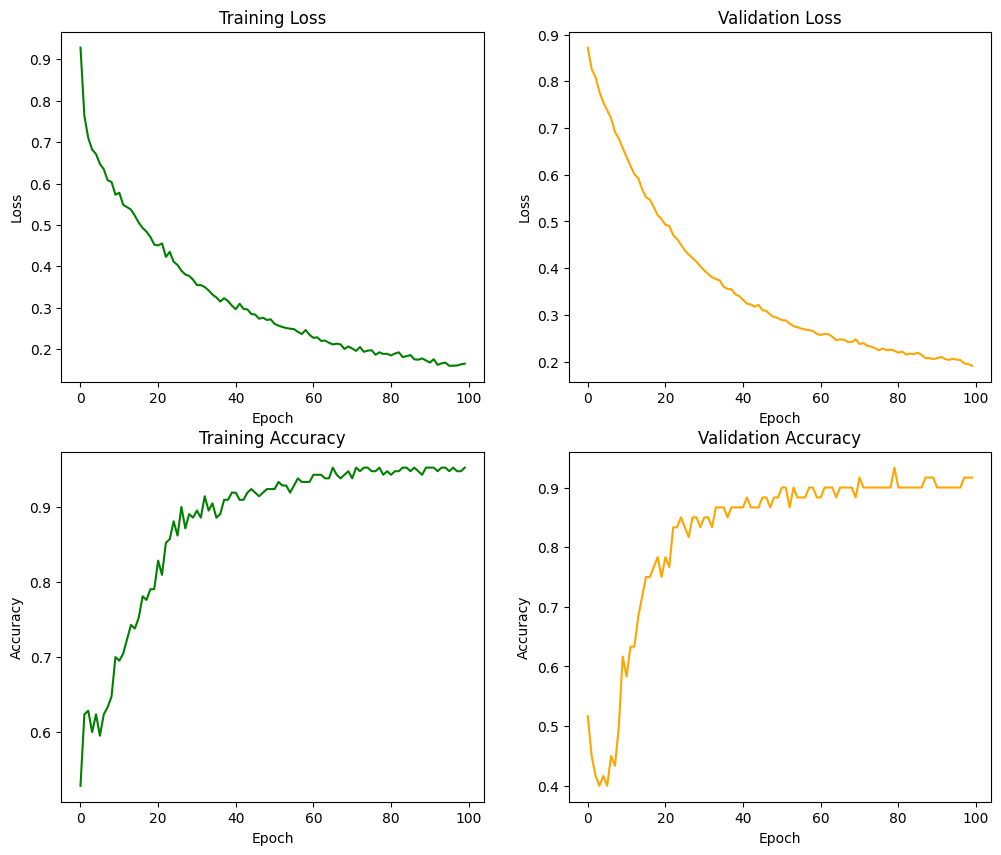

In [38]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))  # Tạo một figure với 2x2 subplots

# Biểu đồ 1: Training Loss
ax[0, 0].plot(train_losses, color='green')  # Vẽ đường biểu diễn loss của tập huấn luyện
ax[0, 0].set(xlabel='Epoch', ylabel='Loss')  # Gán nhãn trục x và y
ax[0, 0].set_title('Training Loss')  # Đặt tiêu đề cho subplot

# Biểu đồ 2: Validation Loss
ax[0, 1].plot(val_losses, color='orange')  # Vẽ đường biểu diễn loss của tập validation
ax[0, 1].set(xlabel='Epoch', ylabel='Loss')  # Gán nhãn trục x và y
ax[0, 1].set_title('Validation Loss')  # Đặt tiêu đề cho subplot

# Biểu đồ 3: Training Accuracy
ax[1, 0].plot(train_accs, color='green')  # Vẽ đường biểu diễn accuracy của tập huấn luyện
ax[1, 0].set(xlabel='Epoch', ylabel='Accuracy')  # Gán nhãn trục x và y
ax[1, 0].set_title('Training Accuracy')  # Đặt tiêu đề cho subplot

# Biểu đồ 4: Validation Accuracy
ax[1, 1].plot(val_accs, color='orange')  # Vẽ đường biểu diễn accuracy của tập validation
ax[1, 1].set(xlabel='Epoch', ylabel='Accuracy')  # Gán nhãn trục x và y
ax[1, 1].set_title('Validation Accuracy')  # Đặt tiêu đề cho subplot

# Hiển thị tất cả các biểu đồ
plt.show()


In [39]:
# Đánh giá mô hình trên tập kiểm tra (test set)
test_target = []  # Danh sách lưu nhãn thực tế
test_predict = []  # Danh sách lưu dự đoán của mô hình

# Chuyển mô hình sang chế độ đánh giá
model.eval()

# Tắt tính toán gradient để tiết kiệm bộ nhớ và thời gian
with torch.no_grad():
    for X_samples, y_samples in test_loader:
        # Chuyển dữ liệu và nhãn sang thiết bị (CPU hoặc GPU)
        X_samples = X_samples.to(device)
        y_samples = y_samples.to(device)

        # Dự đoán từ mô hình
        outputs = model(X_samples)

        # Lưu dự đoán và nhãn thực tế
        test_predict.append(outputs.cpu())
        test_target.append(y_samples.cpu())

# Kết hợp tất cả các batch thành một tensor duy nhất
test_predict = torch.cat(test_predict)
test_target = torch.cat(test_target)

# Tính độ chính xác trên tập kiểm tra
test_acc = compute_accuracy(test_predict, test_target)

# In kết quả đánh giá
print('Evaluation on test set:')
print(f'Accuracy: {test_acc:.3f}')


Evaluation on test set:
Accuracy: 0.933


# Bài toán 3

In [3]:
!gdown --id 1GaTMURqIQTjtalbNVAyVgPIEis21A0r8
!unzip -q './FER-2013.zip'

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1GaTMURqIQTjtalbNVAyVgPIEis21A0r8
From (redirected): https://drive.google.com/uc?id=1GaTMURqIQTjtalbNVAyVgPIEis21A0r8&confirm=t&uuid=46772446-786d-4400-b46a-13bd789e5ea2
To: /content/FER-2013.zip
100% 63.3M/63.3M [00:01<00:00, 40.4MB/s]
replace test/angry/PrivateTest_10131363.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [18]:
import cv2
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms import Resize
from torchvision.io import read_image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



In [19]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
random_state = 59
np.random.seed(random_state)
torch.manual_seed(random_state)
if torch.cuda.is_available():
    torch.cuda.manual_seed(random_state)


In [20]:
train_dir = '/content/train'
test_dir = '/content/test'

classes = os.listdir(train_dir)

label2idx = {cls: idx for idx, cls in enumerate(classes)}
idx2label = {idx: cls for cls, idx in label2idx.items()}


In [21]:
test_img_path = '/content/train/angry/Training_10118481.jpg'
img = cv2.imread(test_img_path)
img_height, img_width = (128, 128)
print(f'Image height: {img_height}')
print(f'Image width: {img_width}')


Image height: 128
Image width: 128


In [22]:
class ImageDataset(Dataset):
    def __init__(self, img_dir, norm, label2idx, split='train', train_ratio=0.8):
        self.resize = Resize((128, 128))
        self.norm = norm
        self.split = split
        self.train_ratio = train_ratio
        self.img_dir = img_dir
        self.label2idx = label2idx
        self.img_paths, self.img_labels = self.read_img_files()

        if split in ['train', 'val'] and 'train' in img_dir.lower():
            train_data, val_data = train_test_split(
                list(zip(self.img_paths, self.img_labels)),
                train_size=train_ratio,
                random_state=59,
                stratify=self.img_labels
            )
            if split == 'train':
                self.img_paths, self.img_labels = zip(*train_data)
            elif split == 'val':
                self.img_paths, self.img_labels = zip(*val_data)

    def read_img_files(self):
        img_paths = []
        img_labels = []
        for cls in self.label2idx.keys():
            class_dir = os.path.join(self.img_dir, cls)
            for img in os.listdir(class_dir):
                img_paths.append(os.path.join(class_dir, img))
                img_labels.append(cls)
        return img_paths, img_labels

    def __len__(self):
        return len(self.img_paths)

    def __getitem__(self, idx):
        img_path = self.img_paths[idx]
        cls = self.img_labels[idx]
        img = self.resize(read_image(img_path))
        img = img.type(torch.float32)
        label = self.label2idx[cls]
        if self.norm:
            img = (img / 127.5) - 1  # Normalize to [-1, 1]
        return img, label

In [23]:
label2idx

{'neutral': 0,
 'happy': 1,
 'disgust': 2,
 'surprise': 3,
 'fear': 4,
 'sad': 5,
 'angry': 6}

In [24]:

# Thiết lập kích thước batch
batch_size = 256

train_dataset = ImageDataset(train_dir, norm=True,label2idx= label2idx, split='train')
train_loader = DataLoader(
    train_dataset,
    batch_size=batch_size,
    shuffle=True
)

# Dữ liệu xác thực
val_dataset = ImageDataset(train_dir, norm=True, label2idx=label2idx, split='val')
val_loader = DataLoader(
    val_dataset,
    batch_size=batch_size,
    shuffle=False
)

# Dữ liệu kiểm tra
test_dataset = ImageDataset(test_dir, norm=True,label2idx= label2idx, split='test')
test_loader = DataLoader(
    test_dataset,
    batch_size=batch_size,
    shuffle=False
)


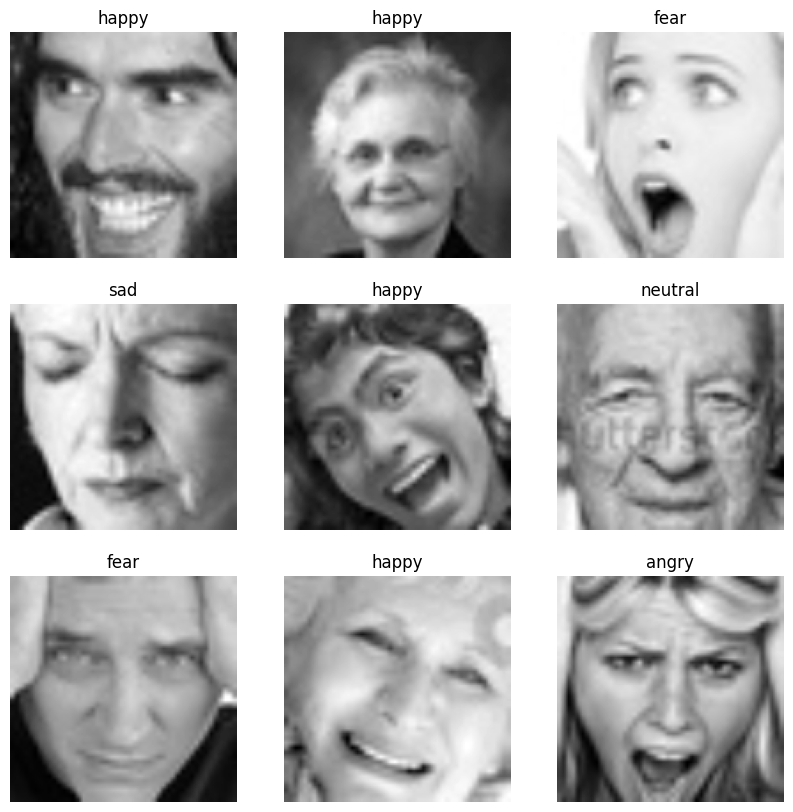

In [25]:
# Lấy một batch dữ liệu từ train_loader
image_batch, label_batch = next(iter(train_loader))

# Hiển thị các hình ảnh trong batch
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)

    # Lấy giá trị min và max của hình ảnh để xác định range hiển thị
    minv = image_batch[i].numpy().min()
    maxv = image_batch[i].numpy().max()

    # Hiển thị hình ảnh
    plt.imshow(
        np.squeeze(image_batch[i].numpy()),
        vmin=minv,
        vmax=maxv,
        cmap="gray"
    )

    # Lấy nhãn và đặt tiêu đề cho ảnh
    label = label_batch[i]
    plt.title(idx2label[label.item()])
    plt.axis("off")


In [26]:
# Định nghĩa lớp MLP (Multilayer Perceptron)
class MLP(nn.Module):
    def __init__(self, input_dims, hidden_dims, output_dims):
        super(MLP, self).__init__()
        # Lớp fully connected đầu tiên: input -> hidden_dims * 4
        self.linear1 = nn.Linear(input_dims, hidden_dims * 4)
        # Lớp fully connected thứ hai: hidden_dims * 4 -> hidden_dims * 2
        self.linear2 = nn.Linear(hidden_dims * 4, hidden_dims * 2)
        # Lớp fully connected thứ ba: hidden_dims * 2 -> hidden_dims
        self.linear3 = nn.Linear(hidden_dims * 2, hidden_dims)
        # Lớp fully connected cuối: hidden_dims -> output_dims
        self.output = nn.Linear(hidden_dims, output_dims)

    def forward(self, x):
        # Làm phẳng input (flatten)
        x = nn.Flatten()(x)
        # Tầng 1 + ReLU
        x = self.linear1(x)
        x = F.relu(x)
        # Tầng 2 + ReLU
        x = self.linear2(x)
        x = F.relu(x)
        # Tầng 3 + ReLU
        x = self.linear3(x)
        x = F.relu(x)
        # Output layer
        out = self.output(x)
        return out.squeeze(1)

# Các tham số cho mô hình
input_dims = img_height * img_width  # Input dimensions (từ kích thước ảnh)
hidden_dims = 64                     # Số chiều của tầng ẩn
output_dims = len(classes)           # Số chiều của output (tương ứng với số lớp)
lr = 1e-2                            # Learning rate

# Khởi tạo mô hình và chuyển nó lên thiết bị (CPU/GPU)
model = MLP(input_dims=input_dims, hidden_dims=hidden_dims, output_dims=output_dims).to(device)


In [27]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)


In [28]:
def compute_accuracy(y_hat, y_true):
    # Lấy chỉ số lớp dự đoán (chỉ số có giá trị cao nhất)
    _, y_hat = torch.max(y_hat, dim=1)

    # Đếm số lượng dự đoán đúng
    correct = (y_hat == y_true).sum().item()

    # Tính toán độ chính xác
    accuracy = correct / len(y_true)

    return accuracy


In [32]:
device

MLP(
  (linear1): Linear(in_features=16384, out_features=256, bias=True)
  (linear2): Linear(in_features=256, out_features=128, bias=True)
  (linear3): Linear(in_features=128, out_features=64, bias=True)
  (output): Linear(in_features=64, out_features=7, bias=True)
)

In [31]:
# Số epoch
epochs = 40

# Danh sách lưu lịch sử loss và accuracy
train_losses = []
val_losses = []
train_accs = []
val_accs = []

for epoch in range(epochs):
    # Huấn luyện
    train_loss = 0.0
    train_target = []
    train_predict = []
    model.train()

    for X_samples, y_samples in train_loader:
        # Chuyển dữ liệu sang thiết bị (GPU/CPU)
        X_samples = X_samples.to(device)
        y_samples = y_samples.to(device)

        # Reset gradient
        optimizer.zero_grad()

        # Forward pass
        outputs = model(X_samples)
        loss = criterion(outputs, y_samples)

        # Backward pass và cập nhật trọng số
        loss.backward()
        optimizer.step()

        # Cộng dồn loss
        train_loss += loss.item()

        # Lưu kết quả dự đoán và nhãn thực tế
        train_predict.append(outputs.detach().cpu())
        train_target.append(y_samples.cpu())

    # Tính trung bình loss cho epoch
    train_loss /= len(train_loader)
    train_losses.append(train_loss)

    # Ghép các batch dự đoán và nhãn thực tế
    train_predict = torch.cat(train_predict)
    train_target = torch.cat(train_target)

    # Tính độ chính xác
    train_acc = compute_accuracy(train_predict, train_target)
    train_accs.append(train_acc)

    # Xác thực
    val_loss = 0.0
    val_target = []
    val_predict = []
    model.eval()

    with torch.no_grad():
        for X_samples, y_samples in val_loader:
            # Chuyển dữ liệu sang thiết bị (GPU/CPU)
            X_samples = X_samples.to(device)
            y_samples = y_samples.to(device)

            # Forward pass
            outputs = model(X_samples)
            val_loss += criterion(outputs, y_samples).item()

            # Lưu kết quả dự đoán và nhãn thực tế
            val_predict.append(outputs.cpu())
            val_target.append(y_samples.cpu())

    # Tính trung bình loss cho epoch
    val_loss /= len(val_loader)
    val_losses.append(val_loss)

    # Ghép các batch dự đoán và nhãn thực tế
    val_predict = torch.cat(val_predict)
    val_target = torch.cat(val_target)

    # Tính độ chính xác
    val_acc = compute_accuracy(val_predict, val_target)
    val_accs.append(val_acc)

    # In kết quả epoch
    print(f"\nEPOCH {epoch + 1}:\tTraining loss: {train_loss:.3f}\tValidation loss: {val_loss:.3f}\t"
          f"Training accuracy: {train_acc:.3f}\tValidation accuracy: {val_acc:.3f}")



EPOCH 1:	Training loss: 1.742	Validation loss: 1.744	Training accuracy: 0.303	Validation accuracy: 0.308

EPOCH 2:	Training loss: 1.723	Validation loss: 1.725	Training accuracy: 0.317	Validation accuracy: 0.318

EPOCH 3:	Training loss: 1.702	Validation loss: 1.704	Training accuracy: 0.331	Validation accuracy: 0.334

EPOCH 4:	Training loss: 1.681	Validation loss: 1.684	Training accuracy: 0.342	Validation accuracy: 0.343

EPOCH 5:	Training loss: 1.663	Validation loss: 1.669	Training accuracy: 0.354	Validation accuracy: 0.355

EPOCH 6:	Training loss: 1.647	Validation loss: 1.656	Training accuracy: 0.360	Validation accuracy: 0.360

EPOCH 7:	Training loss: 1.635	Validation loss: 1.647	Training accuracy: 0.368	Validation accuracy: 0.359

EPOCH 8:	Training loss: 1.623	Validation loss: 1.641	Training accuracy: 0.373	Validation accuracy: 0.366

EPOCH 9:	Training loss: 1.614	Validation loss: 1.631	Training accuracy: 0.376	Validation accuracy: 0.372

EPOCH 10:	Training loss: 1.605	Validation los

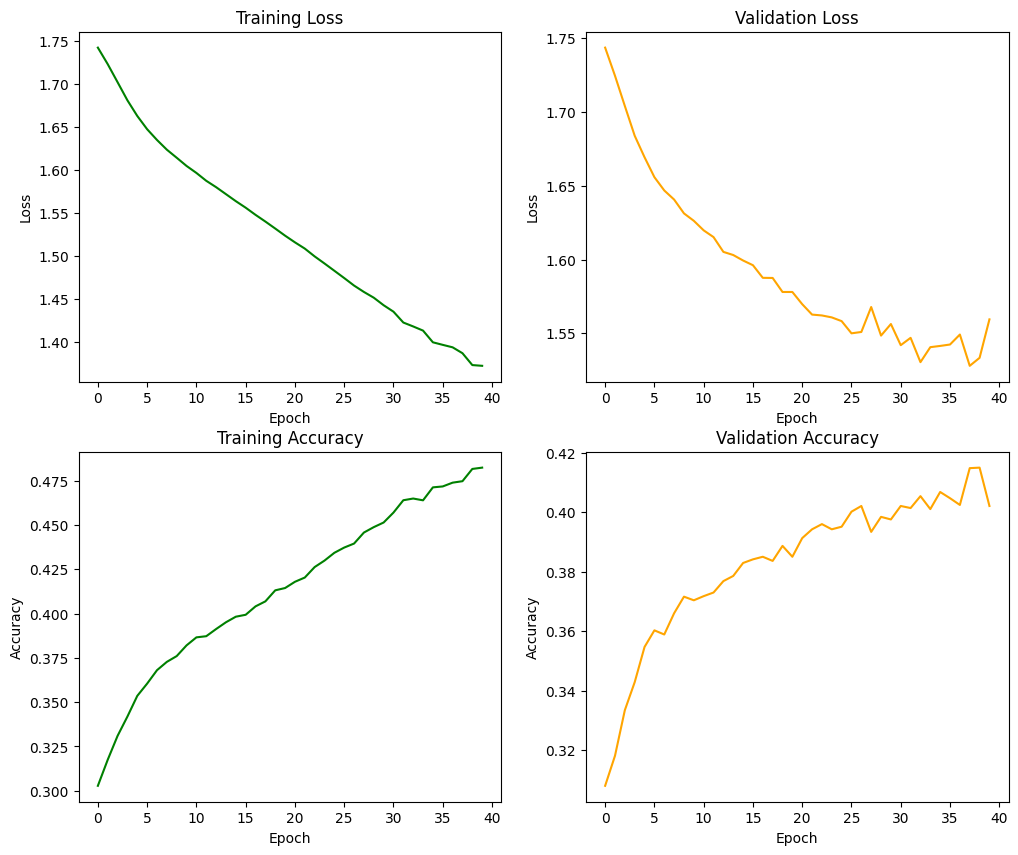

In [33]:
# Tạo lưới đồ thị 2x2
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

# Đồ thị 1: Training Loss
ax[0, 0].plot(train_losses, color='green')
ax[0, 0].set(xlabel='Epoch', ylabel='Loss')
ax[0, 0].set_title('Training Loss')

# Đồ thị 2: Validation Loss
ax[0, 1].plot(val_losses, color='orange')
ax[0, 1].set(xlabel='Epoch', ylabel='Loss')
ax[0, 1].set_title('Validation Loss')

# Đồ thị 3: Training Accuracy
ax[1, 0].plot(train_accs, color='green')
ax[1, 0].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 0].set_title('Training Accuracy')

# Đồ thị 4: Validation Accuracy
ax[1, 1].plot(val_accs, color='orange')
ax[1, 1].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 1].set_title('Validation Accuracy')

# Hiển thị đồ thị
plt.show()


In [34]:
# Khởi tạo danh sách để lưu dự đoán và nhãn thực tế
test_target = []
test_predict = []

# Chuyển mô hình sang chế độ đánh giá
model.eval()

# Tắt tính toán gradient
with torch.no_grad():
    for X_samples, y_samples in test_loader:
        # Chuyển dữ liệu sang thiết bị (GPU hoặc CPU)
        X_samples = X_samples.to(device)
        y_samples = y_samples.to(device)

        # Dự đoán từ mô hình
        outputs = model(X_samples)

        # Lưu dự đoán và nhãn thực tế
        test_predict.append(outputs.cpu())
        test_target.append(y_samples.cpu())

# Kết hợp các batch thành một tensor duy nhất
test_predict = torch.cat(test_predict)
test_target = torch.cat(test_target)

# Tính độ chính xác trên tập kiểm tra
val_acc = compute_accuracy(test_predict, test_target)

# In kết quả
print('Evaluation on test set:')
print(f'Accuracy: {val_acc:.3f}')


Evaluation on test set:
Accuracy: 0.408
